# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

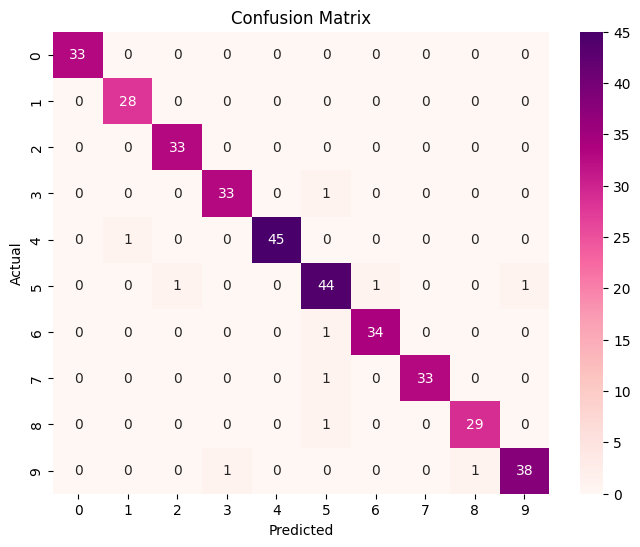

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Shape de y_test: (360,)
Shape de y_scores: (360, 10)


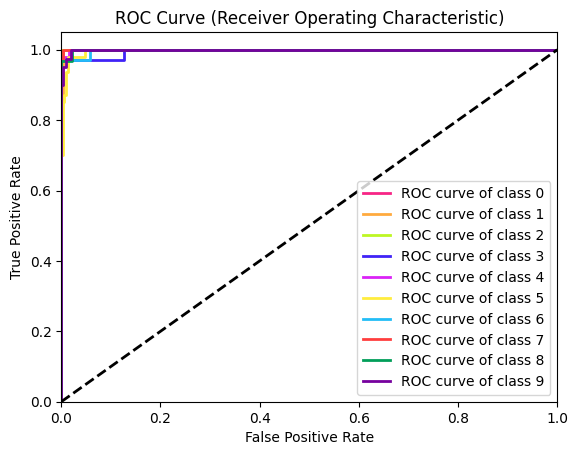

Class 0
FPR: [0. 0. 0. 1.]
TPR: [0.         0.03030303 1.         1.        ]
Thresholds: [2.00000000e+00 9.99999996e-01 7.72234726e-01 5.06413902e-21]

Class 1
FPR: [0.         0.         0.         0.00301205 0.00301205 1.        ]
TPR: [0.         0.03571429 0.85714286 0.85714286 1.         1.        ]
Thresholds: [1.99999967e+00 9.99999675e-01 9.93911346e-01 9.92865722e-01
 9.82288391e-01 1.01924635e-21]

Class 2
FPR: [0. 0. 0. 1.]
TPR: [0.         0.03030303 1.         1.        ]
Thresholds: [2.00000000e+00 9.99999999e-01 6.11015919e-01 7.87311533e-26]

Class 3
FPR: [0.         0.         0.         0.12576687 0.12576687 1.        ]
TPR: [0.         0.02941176 0.97058824 0.97058824 1.         1.        ]
Thresholds: [1.99999999e+00 9.99999994e-01 9.91385748e-01 1.52719850e-05
 1.34474051e-05 2.19996684e-30]

Class 4
FPR: [0.         0.         0.         0.01592357 0.01592357 1.        ]
TPR: [0.         0.02173913 0.97826087 0.97826087 1.         1.        ]
Thresholds: [2.00000

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
%matplotlib inline


y_scores = model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print("Shape de y_test:", y_test.shape)
print("Shape de y_scores:", y_scores.shape)

# Calculate ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(10):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:,i], y_scores[:, i])

# Plot All Curves ROC
plt.figure()
colors = cycle(['#F72585','#FFAA3E','#BDF723','#4023F7','#DA23F7','#FFED3E','#23BDF7','#FF3E3E','#019E59','#76019E'])
for i, color in zip(range(10), colors):
  # Plot the FPR and TPR achieved by our model
  plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0}'.format(i))

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

# Mostrar los valores de FPR, TPR y thresholds para cada clase
for i in range(10):
    print(f'Class {i}')
    print(f'FPR: {fpr[i]}')
    print(f'TPR: {tpr[i]}')
    print(f'Thresholds: {thresholds[i]}\n')

In [24]:
# Calculate AUC score
auc = dict()
for i in range(10):
  auc[i] = roc_auc_score(y_test_bin[:,i],y_scores[:,1])
print(f'AUC:{auc}')

AUC:{0: 0.22509498656287646, 1: 0.9995697074010327, 2: 0.525993883792049, 3: 0.2518946228798268, 4: 0.543616726668513, 5: 0.39480660730065936, 6: 0.4306813186813187, 7: 0.5252616383976904, 8: 0.7645454545454545, 9: 0.468671875}
